# Second Week

___

## The Regular Expression Module

### Re-Module

<B> `import re` <br/>
`re.search()` <br/>
`re.findall()` <br/>

In [24]:
import re
hand = open(r"C:\Users\Elambharathi\Desktop\Coursera\week2test.txt")
for line in hand:
    line=line.rstrip()
    if re.search("From:",line):
        print(line)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Elambharathi\\Desktop\\Coursera\\week2test.txt'

<B> THE STARTING WORD SHOULD BE FROM:, SO, WE USE THE SYMBOL "^"

In [ ]:
import re
hand = open(r"C:\Users\Elambharathi\Desktop\Coursera\week2test.txt")
for line in hand:
    line=line.rstrip()
    if re.search("^From:",line):
        print(line)

### Wild-Card Characters

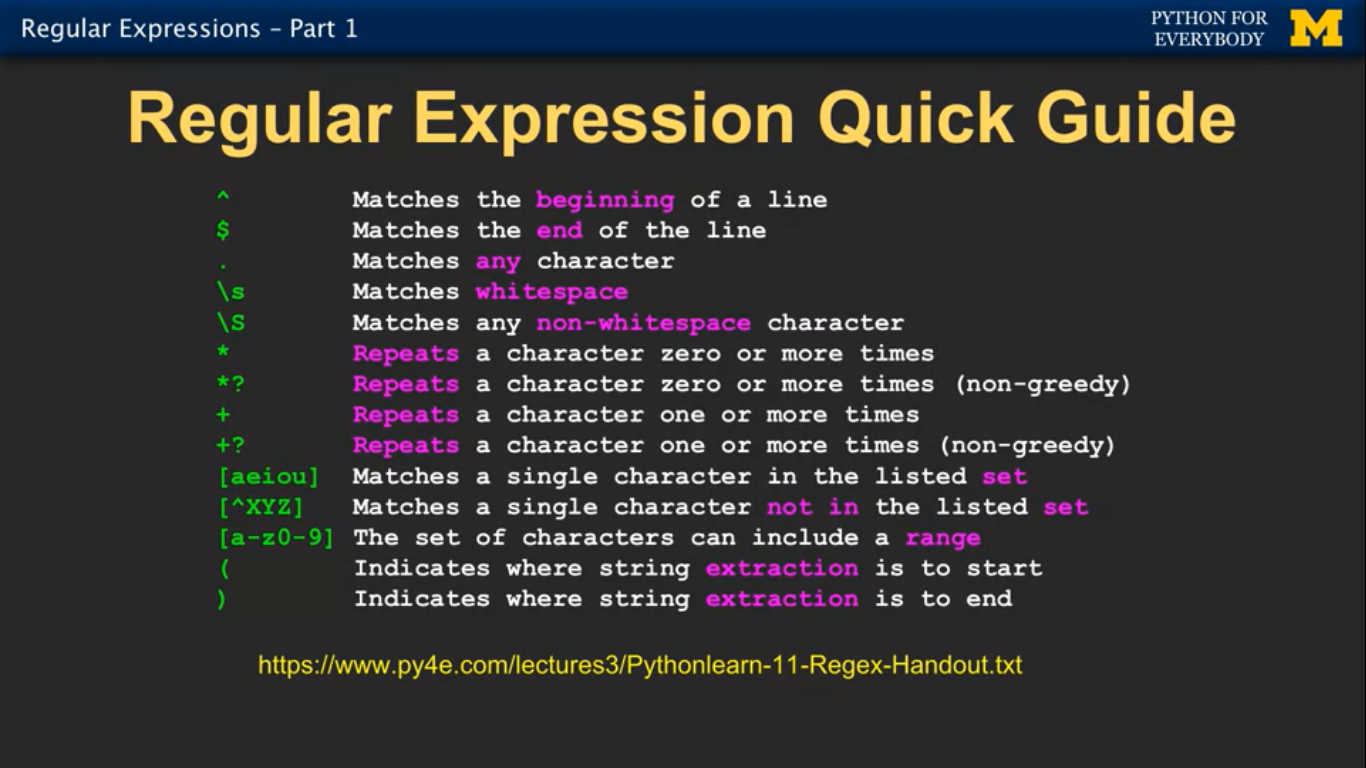

 FOR EXAMPLE: <b>^X.*: </b> <br/> 
 1) ^X - The line should start with X <br/>
 2) .* - Matches any character, zero or more tomes <br/>
 3) :  - End with : <br/>
 Ex: X-Cool:
 

    

FOR EXAMPLE : <b> ^X-\S+: </b> <br/>
1)^X-  - Match the start of the line <br/>
2)\S   - Continued by non-space characters <br/>
3)+    - One or more times <br/>
4):    - End with colon <br/>
    Ex: X-COOL-THIS will satisfy this <br/>
        X-PLANE IS COOL: will not satisfy this

### Matching And Extracting Data

<b> re.findall()

In [ ]:
import re
x = "I have got 1 brother but my friends have 2 or 3 brothers"
y = re.findall('[0-9]+',x)
print(y)

In [ ]:
y = re.findall('[AEIOU]+',x)
print(y)

<b>The '+' looks for the longest string possible

In [ ]:
x = 'From: Using the : character'
y = re.findall('^F.+:',x)
print(y)

<b> The non-greedy Matching </b><br/>
    This prefers the shortest string possible - Using +? or *?

In [25]:
x = 'From: Using the : character'
y = re.findall('^F.+?:',x)
print(y)

['From:']


<b> String Extraction

In [26]:
x = 'From cool@gmail.com.in Sun Feb 8 09:12:16 2003'
y = re.findall('\S+@\S+',x)
print(y)

['cool@gmail.com.in']


<B> Fine-tuning
   

The matching string is different and the extracting string is different <br/>
* Only the string inside the paranthesis will be extracted

In [27]:
x = 'From cool@gmail.com.in Sun Feb 8 09:12:16 2003'
y = re.findall('From (\S+@\S+)',x)
print(y)

['cool@gmail.com.in']


<b> The double slit pattern

In [28]:
x = 'From cool@gmail.com.in Sun Feb 8 09:12:16 2003'
words = x.split()
email = words[1]
line = email.split('@')
print(line[1])

gmail.com.in


<b> The regex version

In [29]:
x = 'From cool@gmail.com.in Sun Feb 8 09:12:16 2003'
y = re.findall('@([^ ]+)',x)
print(y)

['gmail.com.in']


<b> Even cooler regex version

In [30]:
x = 'From cool@gmail.com.in Sun Feb 8 09:12:16 2003'
y = re.findall('From .*@([^ ]*)',x)
print(y)

['gmail.com.in']


<b> Escape Character </b> <br/>
Use ' \\ ' to make a special character normal

In [31]:
x = 'I got $40 today'
y = re.findall('\$[0-9.]+',x)
print(y)

['$40']


In [32]:
a = "From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008"
b = re.findall('\S+?@\S+',a)
print(b)

['stephen.marquard@uct.ac.za']


# Third Week

---

## Network Data

### TCP (Transport Control Layer)

- Built on top of IP
- Handles "flow control" using a transmit window
- Assumes IP might lose some data-stores and retransmits data if it seems to be lost

### Sockets / TCP Connections

- Socket or network socket is an endpoint of a bidirectional inter-process communication flow across an internet-protocol based computer network, such as the internet
- Helps internet to make conversations

###  TCP Port Numbers

- A port is an application-specific or process-specific software communication endpoint
- It allows multiple networked applications to coexist on the same server
- Port 80 is the web port
- Port 443 is the https
- The usual :8080 in websites is the port

### Sockets

<b> Python has built-in support for TCP Sockets </b>

In [9]:
import socket
mysock = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org',80))

### HTTP - Hypertext Transfer Protocol

- The domininant application layer protocol on the internet
- Invented for the web - to retreive HTML, images, docs, etc.


<b> URL </b> <br>
<br>
`http://www.dr-chuck.com/page1.htm` <br>
<br>
`http://` - Protocol <br>
<br>
`www.dr-chuck.com` - host <br>
<br>
`/page1.htm` - document 


### Internet Standards

- The standards for all internet protocols are developed by an organization 
<br>
<br>
- INTERNET ENGINEERING TASK FORCE (IETF)
<br>
<br>
- Standards are called "RFCs" - "Request for Comments"

## HTTP Request in python

In [14]:
import socket
mysock = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org',80))
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if (len(data)<1):
        break
    print(data.decode())
mysock.close()

HTTP/1.1 200 OK
Date: Fri, 01 May 2020 07:46:42 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "a7-54f6609245537"
Accept-Ranges: bytes
Content-Length: 167
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already s
ick and pale with grief



## HTTP Status Codes

1. `200` - Standard response for successful HTTP requests <br> <br>
2. `302` - Tells the client to look at another URL. Redirects <br><br>
3. `404` - Request not found. Error

# Fourth Week

---

## Unicode characters and strings

###  ASCII - American Standard Code For Information Interchange  


- Each character is represented by a number between 0 and 256 stored in 8 bits of memory <br><br>
- We refer to "8 bits of memory" as a "byte" of memory <br><br>
- The `ord()` function tells us the numeric value of a simple ASCII character

In [22]:
print(ord('A'))
print(ord('Z'))
print(ord('a'))
print(ord('z'))
print(ord('\n'))

65
90
97
122
10


### Multi-Byte Characters

<b> To represent the wide range of characters computers must handle we represent characters with more than one byte </b><br>
- `UTF-16` - Fixed length - Two bytes <br>
- `UTF-32` - Fixed length - Four bytes <br>
- `UTF-8`  - 1-4 bytes : Most commonly used<br><br>
- Upward compatible with ASCII<br>
- Automatic detection between ASCII and UTF-8<BR>
- `UTF-8` is recommended practice for encoding data to be exchanged between systems<br><br>
- <b>Inside python every string is the Unicode</b>

- <i><b> Python 2 vs Python 3 <b><i>

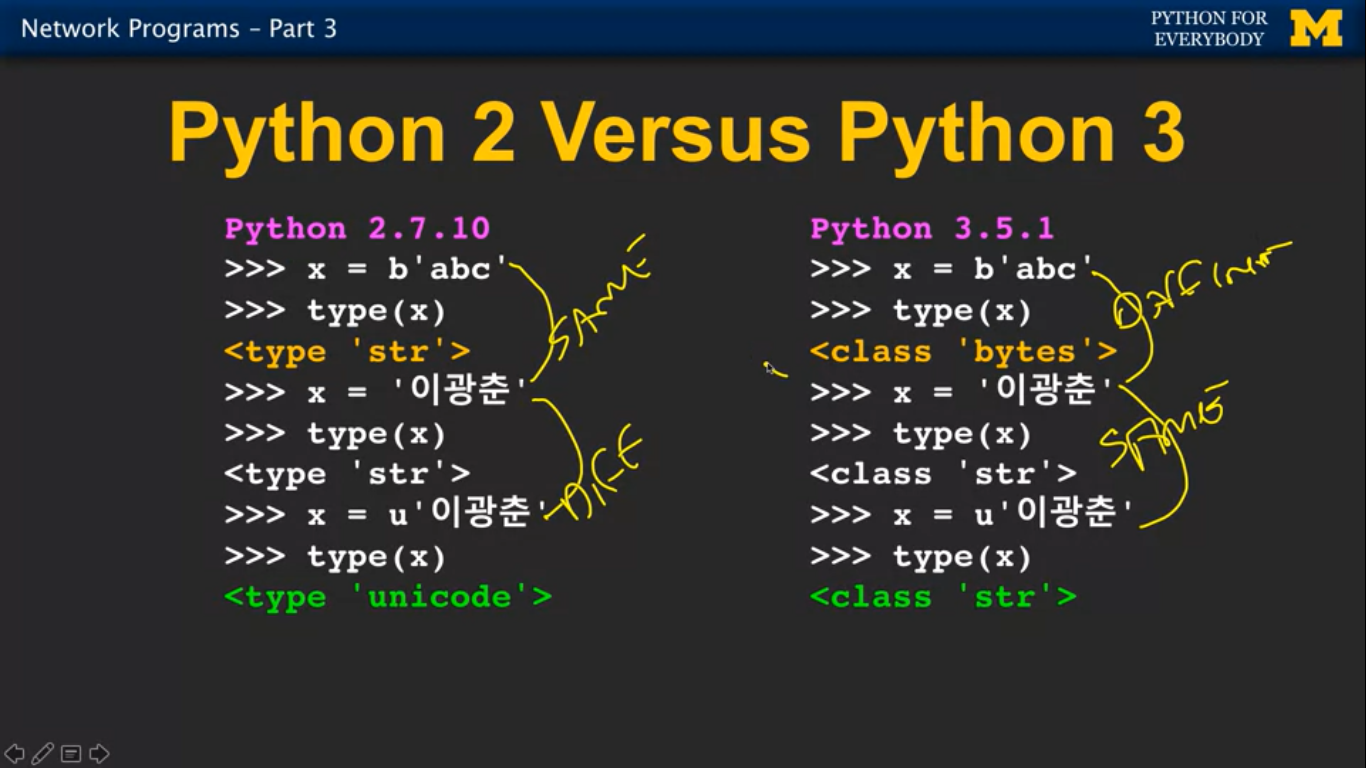


`Python-2`<br>
-  Normal string and bytes are the same<br>
-  Normal string and unicode are different<br>

`Python-3`<br>
-  Normal string and bytes are different <br>
-  Normal string and unicode are same<br>

### Ptyhon Strings to Bytes

- When we talk to an external resource like a network socket we send bytes, so we need to encode Python3 strings into a given character encoding <br><br>
- When we read data from an external resource, we must decode it based on the character set so it is properly represented in Python3 as a string<br><br>
1) A string will be encoded into bytes by UTF-8 and be sent to the socket<BR><BR>
2) The bytes will be recieved and decoded into string by UTF-8

### urllib

In [36]:
import urllib.request,urllib.parse,urllib.error
fhand = urllib.request.urlopen("http://data.pr4e.org/romeo.txt")
for line in fhand:
    print(line.decode().strip())

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


<b>Handling webpage like a file<b>

In [37]:
import urllib.request,urllib.parse,urllib.error
fhand = urllib.request.urlopen("http://data.pr4e.org/romeo.txt")
counts = dict()
for line in fhand:
    words=line.decode().split()
    for word in words:
        counts[word]=counts.get(word,0)+1
print(counts)

{'But': 1, 'soft': 1, 'what': 1, 'light': 1, 'through': 1, 'yonder': 1, 'window': 1, 'breaks': 1, 'It': 1, 'is': 3, 'the': 3, 'east': 1, 'and': 3, 'Juliet': 1, 'sun': 2, 'Arise': 1, 'fair': 1, 'kill': 1, 'envious': 1, 'moon': 1, 'Who': 1, 'already': 1, 'sick': 1, 'pale': 1, 'with': 1, 'grief': 1}


## Web Scraping

* When a program or script pretends to be a browser and retrieves web pages, looks at those web pages, extracts information, and then looks at more web pages <br><br>
* Search engines scrape web pages - we call this "spidering the web" or "web crawling"

## Beautiful Soup
- <b>Used to retrieve and parse html and pull out anchor tag<b>

In [58]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup

url = input('Enter - ')
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html,'html.parser')

# Retrieving all of the anchor tags
tags = soup('a') 
for tag in tags:
    print(tag.get('href',None))

Enter - https://www.google.co.in/?gfe_rd=cr&ei=52_hVbDYMOrI8AfPhZyADw
https://www.google.co.in/imghp?hl=en&tab=wi
https://maps.google.co.in/maps?hl=en&tab=wl
https://play.google.com/?hl=en&tab=w8
https://www.youtube.com/?gl=IN&tab=w1
https://news.google.co.in/nwshp?hl=en&tab=wn
https://mail.google.com/mail/?tab=wm
https://drive.google.com/?tab=wo
https://www.google.co.in/intl/en/about/products?tab=wh
http://www.google.co.in/history/optout?hl=en
/preferences?hl=en
https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=https://www.google.co.in/%3Fgfe_rd%3Dcr%26ei%3D52_hVbDYMOrI8AfPhZyADw
/advanced_search?hl=en-IN&authuser=0
https://www.google.com/url?q=https://safety.google/intl/en_in/securitytips-covid19/%3Futm_source%3DGoogleUK%26utm_medium%3DDesktop%26utm_campaign%3DSafetyCenter%26utm_term%3DScams%26utm_content%3DEveryone&source=hpp&id=19017732&ct=3&usg=AFQjCNFZGXhlUyyiP7nb6Cq6fcZhU3Q7dw&sa=X&ved=0ahUKEwjUg-GTzpbpAhUR7HMBHQZECaAQ8IcBCAU
https://www.google.co.in/setprefs?

In [81]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl

# Ignore SSL certificate errors
# And dealing with the https problem
ctx =  ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter - ')
html = urllib.request.urlopen(url, context=ctx).read()
soup = BeautifulSoup(html,'html.parser') 

# Retrieve all of the anchor tags
tags = soup('a')
for tag in tags:
    print(tag.get('href',None))

Enter - https://www.google.com/
https://www.google.co.in/imghp?hl=en&tab=wi
https://maps.google.co.in/maps?hl=en&tab=wl
https://play.google.com/?hl=en&tab=w8
https://www.youtube.com/?gl=IN&tab=w1
https://news.google.co.in/nwshp?hl=en&tab=wn
https://mail.google.com/mail/?tab=wm
https://drive.google.com/?tab=wo
https://www.google.co.in/intl/en/about/products?tab=wh
http://www.google.co.in/history/optout?hl=en
/preferences?hl=en
https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=https://www.google.com/
/advanced_search?hl=en-IN&authuser=0
https://www.google.com/url?q=https://safety.google/intl/en_in/securitytips-covid19/%3Futm_source%3DGoogleUK%26utm_medium%3DDesktop%26utm_campaign%3DSafetyCenter%26utm_term%3DScams%26utm_content%3DEveryone&source=hpp&id=19017732&ct=3&usg=AFQjCNFZGXhlUyyiP7nb6Cq6fcZhU3Q7dw&sa=X&ved=0ahUKEwiBr8Sx_ZbpAhWGzTgGHdtXAnMQ8IcBCAU
https://www.google.com/setprefs?sig=0_eRJwC7yHFdK881ldQXvzQnhjhgI%3D&hl=hi&source=homepage&sa=X&ved=0ahUKEwiBr8Sx_ZbpA

# Fifth Week

## Data on the web

* With the HTTP Request/Response well understood and well supported, there was a natural move towards exchanging data between programs using these protocols <br><br>
* We needed to come up with an agreed way to represent data going between applications and across networks<br><br>
* There are two commonly used formats: XML and JSON - Serialization Formats

### Wire Format

1. A python data structure like a dictionary will be serialized into a JSON file
2. The JSON file will again be De-Serialized by another language like Java HashMap

## eXtensible Markup Language (XML)

### XML "Elements"(or Nodes)

1. Simple elements
2. Complex elements

* Primary purpose is to help information systems share structured data
* It started as a simplified subset of the Standard Generalized Markup Language (SGML), and is designed to be relatively human-legible

### XML Basics 

<span style='color:Green'> * Start Tag </span> <br>
    <span style='color:Blue'> * End Tag  </span> <br>
        <span style='color:Red'> * Text Content </span> <br>
            <span style='color:Orange'> * Attribute </span> <br>
                <span style='color:Violet'> * Self Closing Tag  </span> <br>


<span style='color:Green'> \< person \> </span> <br>
<span style='color:Green'> \< name \> </span> <span style='color:Red'> Chuck </span> <span style='color:Blue'> \</ name \> </span> <br>
<span style='color:Green'> \< phone </span>  <span style='color:Orange'> type="intl" \> </span> <br>
<span style='color:Red'> +1 734 303 2299 </span> <br>
<span style='color:Blue'> \</ phone \> </span> <br>
<span style='color:Violet'> \< email \> </span> <span style='color:Orange'> hide="yes" </span> <span style='color:Violet'>  \/> </span> <br>
<span style='color:Blue'> \</ person \> </span> <br>

### XML Terminology

* <b> Tags </b> Indicate the begining and the ending of elements<br><br>
* <b> Attributes </b> Keyword/Value pairs on the opening tag of XML<br><br>
* <b> Serialize/ De-Serialize </b> Convert data in one program into a common format that can be stored and/or transmitted between systems in a programming language-independent manner<br><br>

### XML as a tree (XML Text and Attributes)

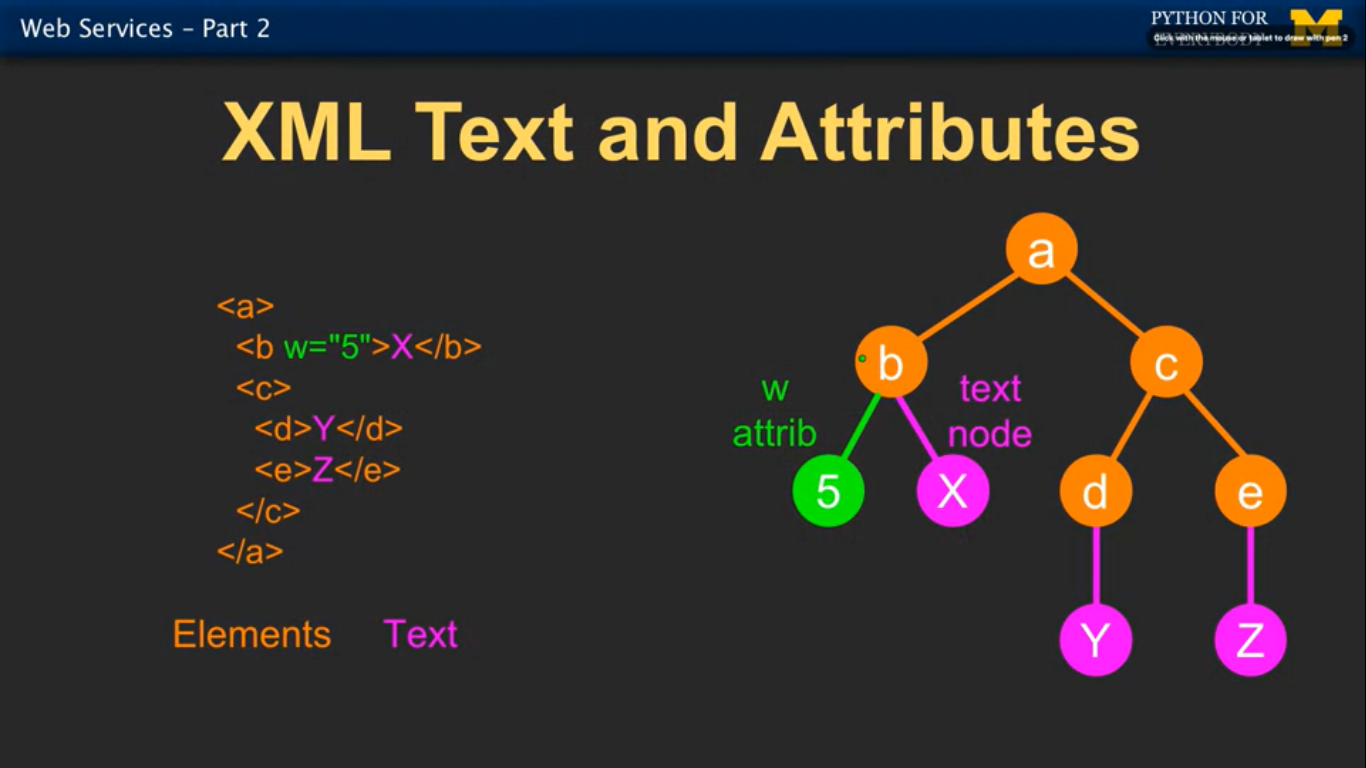

### XML as paths

* For the above example, we can write the XML as a path as follows:<br><br>
1. /a/b `x`
2. /a/c/d `Y`
3. /a/c/e `Z`

### XML Schiema

<b> XML Validation </b>

* XML validation is the act of taking a document and a schema contract, which itself is also an XML document, and then sending to the validator. <br><br>
* XML Schema Languages :
    1. Document Type Definition(DTD)
    2. Standard Generalized Markup Language(SGML)
    3. XML Schema from W3C - (XSD)
    


### XSD XML Schema 

* This is a focus on the World Wide Web Consortium (W3C) version
* It's file ends with .xsd

### Parsing XML

In [9]:
import xml.etree.ElementTree as ET
data ='''<person>
    <name>Elam</name>
    <phone>type="intl">
    +91 94434 78944
    </phone>
    <email hide="yes"/>
</person>'''

tree = ET.fromstring(data)
print('Name:',tree.find('name').text)
print('Attr:',tree.find('email').get('hide'))


Name: Elam
Attr: yes


In [1]:
import xml.etree.ElementTree as ET
input = '''<stuff>
    <users>
        <user x="2">
            <id>001</id>
            <name>Chuck</name>
        </user>
        <user x="7">
            <id>009</id>
            <name>Taylor</name>
        </user>
    </users>
</stuff>
'''

stuff = ET.fromstring(input)
lst = stuff.findall('users/user')     #gives a list of tags, not the text
print('User count:',len(lst))
for item in lst:                      #iterate through the tags
    print('Name',item.find('name').text)
    print('Id',item.find('id').text)
    print('Attribute',item.get('x'))

User count: 2
Name Chuck
Id 001
Attribute 2
Name Taylor
Id 009
Attribute 7


### XML Example

In [2]:
import xml.etree.ElementTree as ET
data = '''
<person>
    <name>Elam</name>
    <phone type='intl'>
        +1 334 303 4455
    </phone>
    <email hide="yes"/>
</person>
'''

tree = ET.fromstring(data)
print('Name:', tree.find('name').text)
print('Attr:', tree.find('email').get('hide'))

Name: Elam
Attr: yes


In [3]:
urllib

NameError: name 'urllib' is not defined